# Set Up

In [16]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/HWK'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from HWK_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Number of comments

## Facebook

In [ ]:
facebook_news=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews.csv')
facebook_vaccines_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored.csv')
facebook_brexit_all_comments_scored=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored.csv')

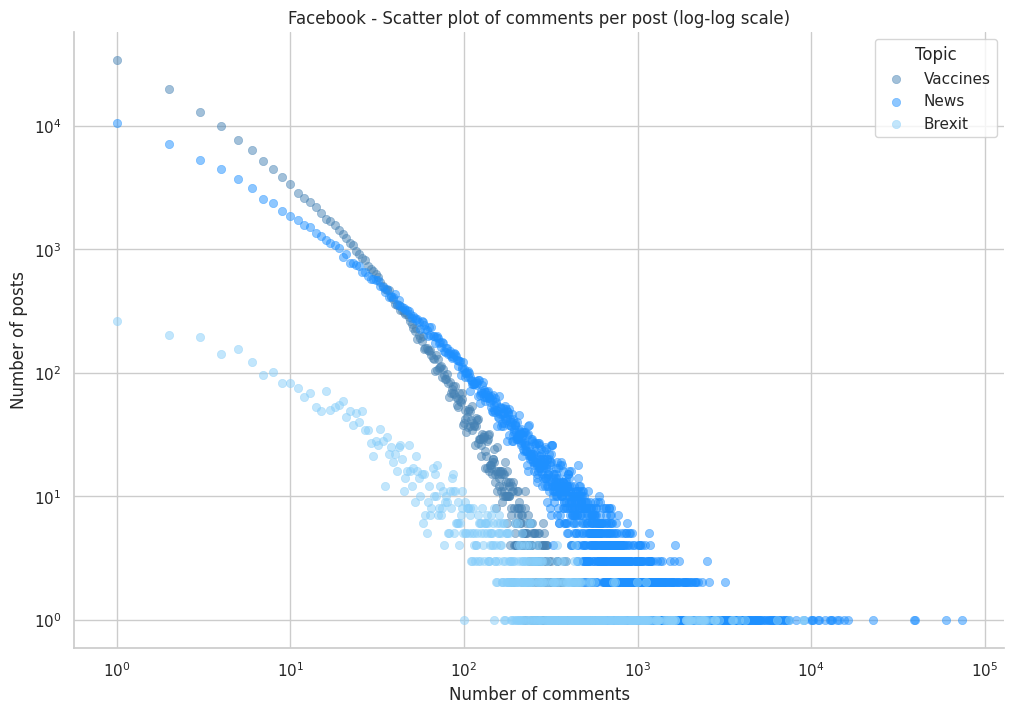

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola il numero di commenti per ogni post per i dati di vaccines
conversation_size_vaccines = facebook_vaccines_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_vaccines.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di news
conversation_size_news = facebook_news.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_news.columns = ['post_id', 'comment_count']

# Calcola il numero di commenti per ogni post per i dati di brexit
conversation_size_brexit = facebook_brexit_all_comments_scored.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_brexit.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti per i dati di vaccines
post_count_vaccines = conversation_size_vaccines.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di news
post_count_news = conversation_size_news.groupby('comment_count').size().reset_index(name='post_count')

# Conta quanti post hanno un determinato numero di commenti per i dati di brexit
post_count_brexit = conversation_size_brexit.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di vaccines
sns.scatterplot(data=post_count_vaccines, x='comment_count', y='post_count', alpha=0.5, label='Vaccines', color='steelblue', edgecolor=None)

# Scatter plot per i dati di news
sns.scatterplot(data=post_count_news, x='comment_count', y='post_count', alpha=0.5, label='News', color='dodgerblue', edgecolor=None)

# Scatter plot per i dati di brexit
sns.scatterplot(data=post_count_brexit, x='comment_count', y='post_count', alpha=0.5, label='Brexit', color='lightskyblue', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Facebook - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')

# Rimuovi la griglia
plt.grid(False)

plt.legend(title='Topic')
plt.show()


## Gab

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
gab = pd.read_parquet('/content/drive/MyDrive/thesis/data/gab/gab_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = gab.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyboardInterrupt: 

## Reddit

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
reddit = pd.read_parquet('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = reddit.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='green', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('Gab - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


KeyError: 'Column not found: comment_id'

## YouTube

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica i dati da Gab
yt = pd.read_parquet('/content/drive/MyDrive/thesis/data/youtube/youtube_labeled_data_unified.parquet')

# Calcola il numero di commenti per ogni post
conversation_size_gab = yt.groupby(['post_id'])['comment_id'].count().reset_index()
conversation_size_gab.columns = ['post_id', 'comment_count']

# Conta quanti post hanno un determinato numero di commenti
post_count_gab = conversation_size_gab.groupby('comment_count').size().reset_index(name='post_count')

# Disegna lo scatter plot con scala logaritmica su entrambi gli assi
plt.figure(figsize=(12, 8))

# Scatter plot per i dati di Gab
sns.scatterplot(data=post_count_gab, x='comment_count', y='post_count', alpha=0.5, color='red', edgecolor=None)

plt.xscale('log')
plt.yscale('log')
plt.title('YouTube - Scatter plot of comments per post (log-log scale)')
plt.xlabel('Number of comments')
plt.ylabel('Number of posts')
plt.xlim(0,100000)
# Rimuovi la griglia
sns.despine()

plt.show()


TypeError: read_table() got an unexpected keyword argument 'usecols'

# Model simulation

In [4]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fbb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')

In [5]:
#fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_1000h'] = fb['temporal_distance_birth_h'] / 100

#fbb= fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_1000h'] = fbb['temporal_distance_birth_h'] / 100

#rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_1000h'] = rd['temporal_distance_birth_h'] / 100

From df to CDF

In [9]:

time_intervals = np.arange(0, 0.24, 0.01)  # Utilizzo di np.arange per intervalli decimali

fbb_ECDF = calculate_ECDF(fbb, time_intervals)
fbb_ECDF['Platform']='Facebook - Brexit'
fb_ECDF = calculate_ECDF(fb, time_intervals)
fb_ECDF['Platform']='Facebook'
rd_ECDF = calculate_ECDF(rd, time_intervals)
rd_ECDF['Platform']='Reddit'

combined_results = pd.concat([fb_ECDF, rd_ECDF,fbb_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 7680/7680 [01:15<00:00, 102.30it/s]


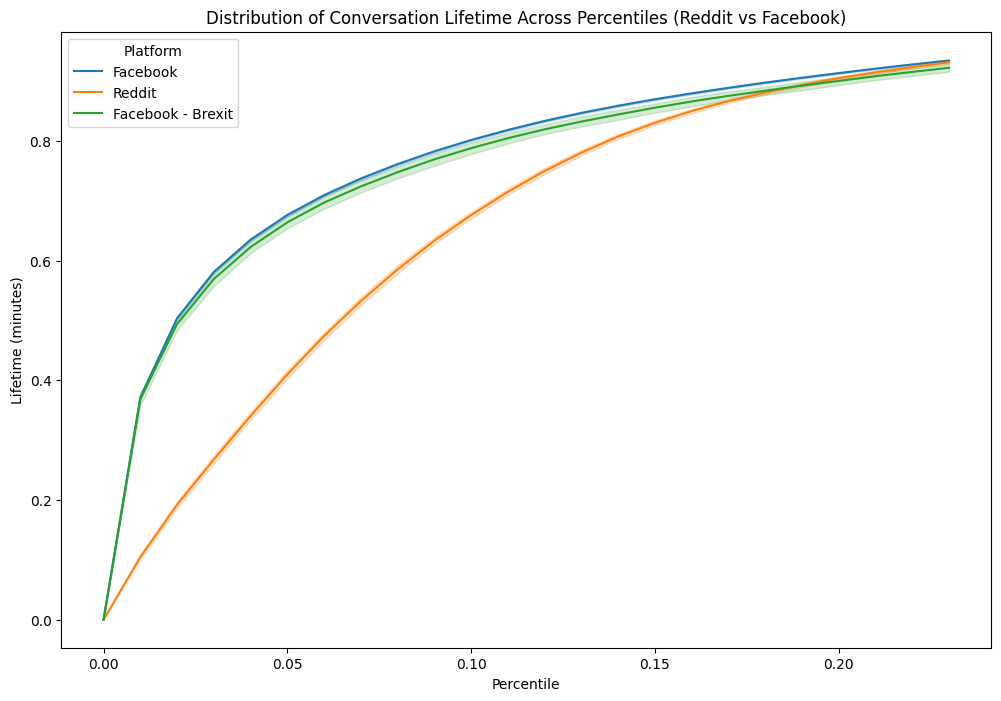

In [17]:
df=combined_results
df=combined_results
plot_ECDF(df,level=95)


# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Functions

In [ ]:
import pandas as pd
import numpy as np

# Parte 1 - Simulo quando l'utente entra nella conversazione
def simulate_inital_comment(alpha, beta, size=1):
    return np.random.beta(alpha, beta, size)

# Parte 2 - Simulo quanti commenti rilascia l'utente
def simulate_number_of_comments(alpha, lambd):
    if np.random.rand() < alpha:
        return 0
    else:
        return np.random.poisson(lambd)
import itertools

# Definizione della funzione per calcolare l'Area Between Curves (ABC) come misura di loss
def calculate_area_between_curves(y1, y2):
    return np.trapz(np.abs(y1 - y2))

# Funzione per eseguire la simulazione e calcolare la loss
def simulate_and_calculate_loss(a,b, alpha,lambda_,mu,sd,k,dataset):
    total_loss = 0
    all_threads=dataset.post_id.unique()
    for t in all_threads:
        thread=dataset[dataset['post_id']==t]
        data = []
        num_users = len(thread.user_id.unique())

        for i in range(num_users):
          T0=simulate_inital_comment(a, b, size=1)
          N=simulate_number_of_comments(alpha, lambda_)
          timing = [0] * N
          for i in range(N):
              if i == 0:
                  timing[i] = T0
              elif i==N-1:
                timing[i] =np.random.normal(mu*k, sd)
              else:
                timing[i] =np.random.normal(mu*k, sd)
          for t in timing:
              data.append({'user_id': f'User_{i}', 'temporal_distance_birth_base_1000h': t})

        simulated = pd.DataFrame(data)
        observed = thread[['user_id', 'temporal_distance_birth_base_1000h']]

        simulated_sorted = np.sort(simulated['temporal_distance_birth_base_1000h'])
        observed_sorted = np.sort(observed['temporal_distance_birth_base_1000h'])

        # Normalizziamo le cumulative se hanno lunghezze diverse
        min_length = min(len(simulated_sorted), len(observed_sorted))
        simulated_cumulative = np.cumsum(simulated_sorted)[:min_length]
        observed_cumulative = np.cumsum(observed_sorted)[:min_length]
        return simulated_cumulative, observed_cumulative
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calc_conversation_lifetime(df, percentiles):
    results = {}
    grouped = df.groupby('post_id')['temporal_distance_birth_base_1000h']

    for perc in percentiles:
        quantiles = grouped.quantile(perc / 100).reset_index()
        quantiles.columns = ['post_id', f'conversation_lifetime_{perc}perc_minutes']
        results[f'{perc}'] = quantiles.set_index('post_id')[f'conversation_lifetime_{perc}perc_minutes']
    result_df = pd.concat(results.values(), axis=1, keys=results.keys(), join='outer')

    return result_df

import numpy as np
import pandas as pd
from tqdm import tqdm

def simulate_data(social, alpha, lambda_, mu, sd, a, b, k=1.0, num_threads=100):
    data = []
    for th in tqdm(social['post_id'].unique()[:num_threads]):
        thread = social[social['post_id'] == th]
        number_of_users = thread['user_id'].nunique()
        T0s = simulate_inital_comment(a, b, size=number_of_users)

        for i in range(number_of_users):
            T0 = T0s[i]
            N = int(simulate_number_of_comments(alpha, lambda_) + 1)
            timing = [0] * N

            for j in range(N):
                if j == 0:
                    timing[j] = T0
                elif j == N-1:
                    timing[j] = abs(np.random.normal(mu, sd) )
                else:
                    timing[j] = abs(np.random.normal(mu * k, sd) )

            timing = np.cumsum(timing)
            timing = [x for x in timing if x <= 1]

            for t in timing:
                data.append({'user_id': f'User_{i}', 'post_id': th, 'temporal_distance_birth_base_1000h': t})

    simulated = pd.DataFrame(data)
    observed = social[social['post_id'].isin(simulated['post_id'].unique())][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]

    return simulated, observed


import pandas as pd

def calculate_total_error(observed, simulated):
    """
    Calculate total error between observed and simulated data.

    Parameters:
    - observed: DataFrame containing observed data.
    - simulated: DataFrame containing simulated data.

    Returns:
    - total_error: Total absolute error between simulated and observed shares.
    """
    # Merge observed and simulated data based on post_id and Time Grid Value
    combined_results = pd.merge(observed, simulated, on=['post_id', 'Time Grid Value'], suffixes=('_Observed', '_Simulated'))

    # Calculate absolute errors
    combined_results['Errors'] = abs(combined_results['Share_Simulated'] - combined_results['Share_Observed'])

    # Calculate total error
    total_error = combined_results['Errors'].sum()

    return total_error


### 0

In [ ]:
import pandas as pd
import numpy as np

# Parte 1 - Simulo quando l'utente entra nella conversazione
def simulate_inital_comment(alpha, beta, size=1):
    return np.random.beta(alpha, beta, size)

# Parte 2 - Simulo quanti commenti rilascia l'utente
def simulate_number_of_comments(alpha, lambd):
    if np.random.rand() < alpha:
        return 0
    else:
        return np.random.poisson(lambd)
import itertools

### 1

In [ ]:

import numpy as np
import pandas as pd
from tqdm import tqdm

def simulate_data(social, alpha, lambda_, mu, sd, a, b, k=1.0, num_threads=100):
    data = []
    for th in tqdm(social['post_id'].unique()[:num_threads]):
        thread = social[social['post_id'] == th]
        number_of_users = thread['user_id'].nunique()
        T0s = simulate_inital_comment(a, b, size=number_of_users)

        for i in range(number_of_users):
            T0 = T0s[i]
            N = int(simulate_number_of_comments(alpha, lambda_) + 1)
            timing = [0] * N

            for j in range(N):
                if j == 0:
                    timing[j] = T0
                elif j == N-1:
                    timing[j] = abs(np.random.normal(mu, sd) )
                else:
                    timing[j] = abs(np.random.normal(mu * k, sd) )

            timing = np.cumsum(timing)
            timing = [x for x in timing if x <= 1]

            for t in timing:
                data.append({'user_id': f'User_{i}', 'post_id': th, 'temporal_distance_birth_base_1000h': t})

    simulated = pd.DataFrame(data)
    observed = social[social['post_id'].isin(simulated['post_id'].unique())][['user_id', 'post_id', 'temporal_distance_birth_base_1000h']]

    return simulated, observed

### 2

In [ ]:
def calculate_ECDF(df, time_intervals):
    # Initialize an empty list to collect the result DataFrames
    results_list = []

    # Group by 'post_id' and calculate comment share for each time interval
    grouped = df.groupby('post_id')['temporal_distance_birth_base_1000h']

    for post_id, group_data in tqdm(grouped, desc=f"Processing DataFrame"):
        results = pd.DataFrame(index=time_intervals)
        total_comments = len(group_data)

        for time in time_intervals:
            comments_within_time = np.sum(group_data < time)
            share = comments_within_time / total_comments
            results.at[time, post_id] = share

        # Reshape the DataFrame to have 'Time Grid Value', 'post_id', and 'Share' in the same row
        results = results.stack().reset_index()
        results.columns = ['Time Grid Value', 'post_id', 'Share']

        # Add the resulting DataFrame to the list
        results_list.append(results)

    # Concatenate all the resulting DataFrames into a single DataFrame
    final_results = pd.concat(results_list, ignore_index=True)

    return final_results

### 3

In [21]:

import pandas as pd

def calculate_loss(observed, simulated):
    """
    Calculate total error between observed and simulated data.

    Parameters:
    - observed: DataFrame containing observed data.
    - simulated: DataFrame containing simulated data.

    Returns:
    - total_error: Total absolute error between simulated and observed shares.
    """
    # Merge observed and simulated data based on post_id and Time Grid Value
    combined_results = pd.merge(observed, simulated, on=['post_id', 'Time Grid Value'], suffixes=('_Observed', '_Simulated'))

    # Calculate absolute errors
    combined_results['Errors'] = abs(combined_results['Share_Simulated'] - combined_results['Share_Observed'])

    # Calculate total error
    total_error = combined_results['Errors'].sum()

    return total_error

## Manual simulation

In [54]:
a=0.8
b=20
alpha=1
lambda_=1
mu=1
sd=1
k=1
simulated, observed=simulate_data(fb, alpha, lambda_, mu, sd, a, b, k=1.0, num_threads=100)

100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


In [55]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Observed'

reddit_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:100])], time_intervals)
reddit_ECDF['Platform']='Reddit'
combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 100/100 [00:00<00:00, 114.85it/s]


In [56]:


error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))

The error is equal to: 190.04


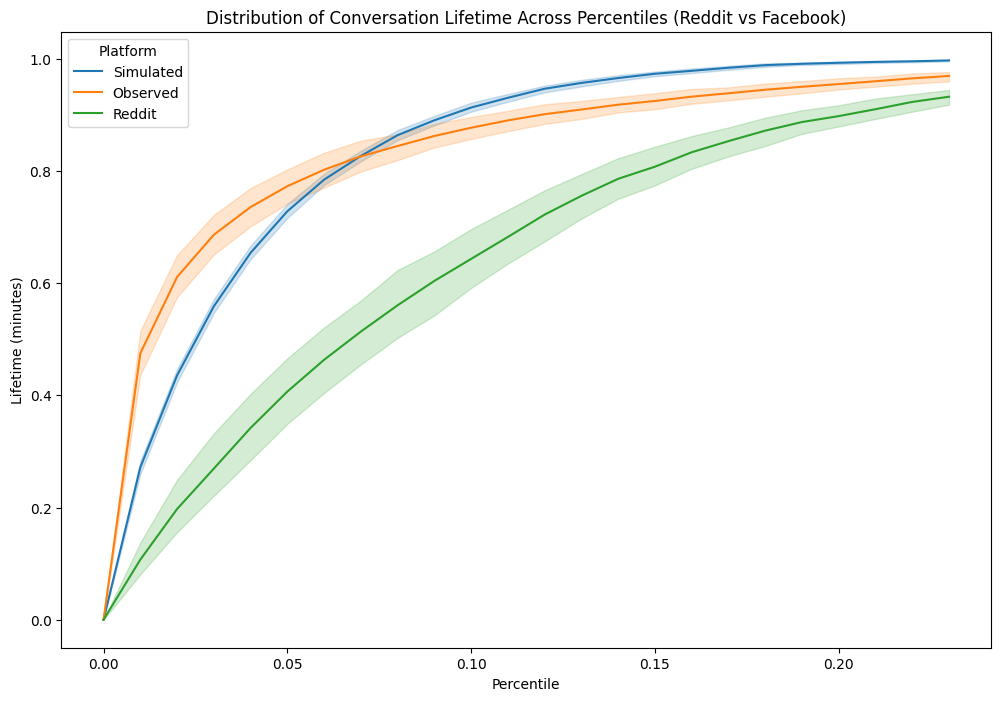

In [57]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF,reddit_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 0.8,20

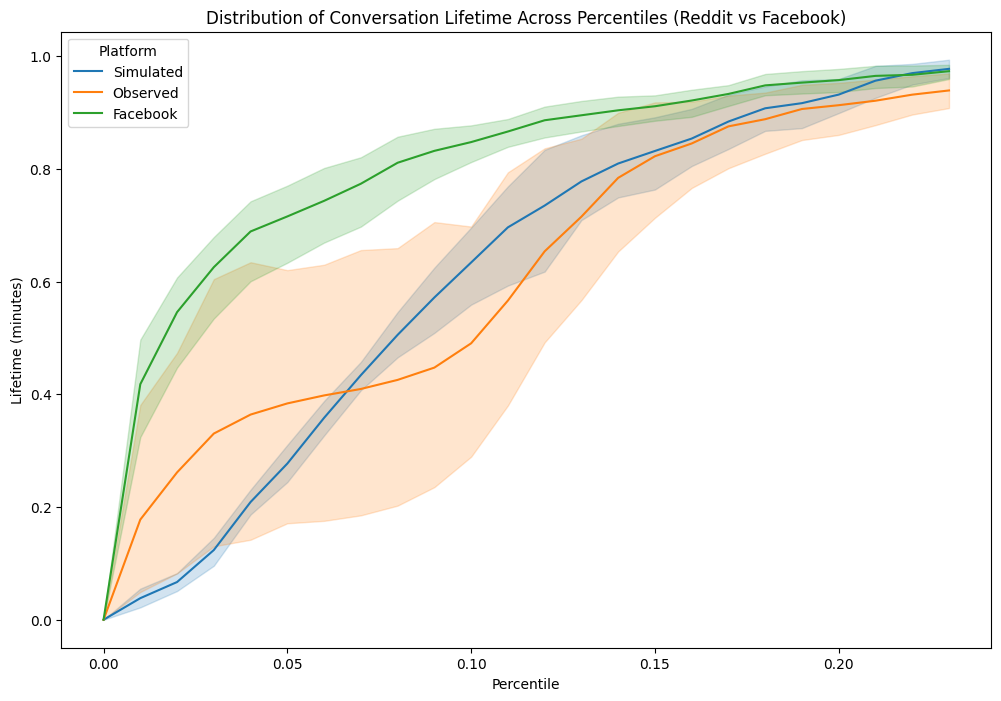

In [49]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF,reddit_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 2,20

## Grid Search

In [32]:
import itertools
import pandas as pd

# Define the grid of parameters
parameters = {
    'a': [ 0.1,0.8,2,3,4,5,7],
    'b': [5,10,15, 20, 25,30],
    'alpha': [1],
    'lambda_': [1],
    'mu': [1],
    'sd': [1],
    'k': [1.0]
}

# Initialize an empty list to store results
results = []

# Generate all combinations of parameters
param_combinations = list(itertools.product(*parameters.values()))

# Loop over each parameter combination
for params in (param_combinations):
    # Unpack the parameters
    a, b, alpha, lambda_, mu, sd, k = params

    # Simulate synthetic data
    simulated, observed = simulate_data(fb, alpha, lambda_, mu, sd, a, b, k, num_threads=10)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))


# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'mu', 'sd', 'k', 'Error'])




,a,b,alpha,lambda_,mu,sd,k,Error
0,0.1,5,1,1,1,1,1.0,22.475660
1,0.1,10,1,1,1,1,1.0,31.839214
2,0.1,15,1,1,1,1,1.0,33.795435
3,0.1,20,1,1,1,1,1.0,34.663632
4,0.1,25,1,1,1,1,1.0,35.510276
5,0.1,30,1,1,1,1,1.0,37.083898
6,0.8,5,1,1,1,1,1.0,70.229256
7,0.8,10,1,1,1,1,1.0,25.480187
8,0.8,15,1,1,1,1,1.0,15.639015
9,0.8,20,1,1,1,1,1.0,14.904662


### Simulation proceess

### Show differences

In [ ]:
import pandas as pd

# Definisci i percorsi dei file CSV
file_paths = [
    '/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv',
    '/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv',
    '/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv',
    '/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored_processed.csv',
    '/content/drive/MyDrive/thesis/data/voat/voat_processed.csv'
]

# Leggi ciascun file CSV in un DataFrame nominato di conseguenza
try:
    rd = pd.read_csv(file_paths[0])
    fbb = pd.read_csv(file_paths[1])
    fbn = pd.read_csv(file_paths[2])
    fbv = pd.read_csv(file_paths[3])
    vo = pd.read_csv(file_paths[4])

    # Ora hai i tuoi DataFrame pronti per essere utilizzati
    print("DataFrames sono stati caricati correttamente.")

except FileNotFoundError as e:
    print(f"File non trovato: {e}")
except pd.errors.EmptyDataError as e:
    print(f"Errore durante il caricamento del DataFrame: {e}")


DataFrames sono stati caricati correttamente.


In [ ]:
fbn = fbn[fbn['temporal_distance_birth_h'] < 1000].copy()
fbn['temporal_distance_birth_base_100h'] = fbn['temporal_distance_birth_h'] / 1000
fbn['thread_birth'] = pd.to_datetime(fbn['thread_birth'])
fbn['year']=fbn['thread_birth'].dt.year



fbb= fbb[fbb['temporal_distance_birth_h'] < 1000].copy()
fbb['temporal_distance_birth_base_100h'] = fbb['temporal_distance_birth_h'] / 1000
fbb['user_id']=fbb['from_id']
fbb['thread_birth'] = pd.to_datetime(fbb['thread_birth'])
fbb['year']=fbb['thread_birth'].dt.year

fbv = fbv[fbv['temporal_distance_birth_h'] < 1000].copy()
fbv['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 1000
fbv['user_id']=fbv['from_id']
fbv['thread_birth'] = pd.to_datetime(fbv['thread_birth'])
fbv['year']=fbv['thread_birth'].dt.year

rd = rd[rd['temporal_distance_birth_h'] < 1000].copy()
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 1000
rd['thread_birth'] = pd.to_datetime(rd['thread_birth'])
rd['year']=rd['thread_birth'].dt.year

vo = vo[vo['temporal_distance_birth_h'] < 1000].copy()
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 1000
vo['post_id']=vo['root_submission']
vo['user_id']=vo['user']
vo['thread_birth'] = pd.to_datetime(vo['thread_birth'])
vo['year']=vo['thread_birth'].dt.year

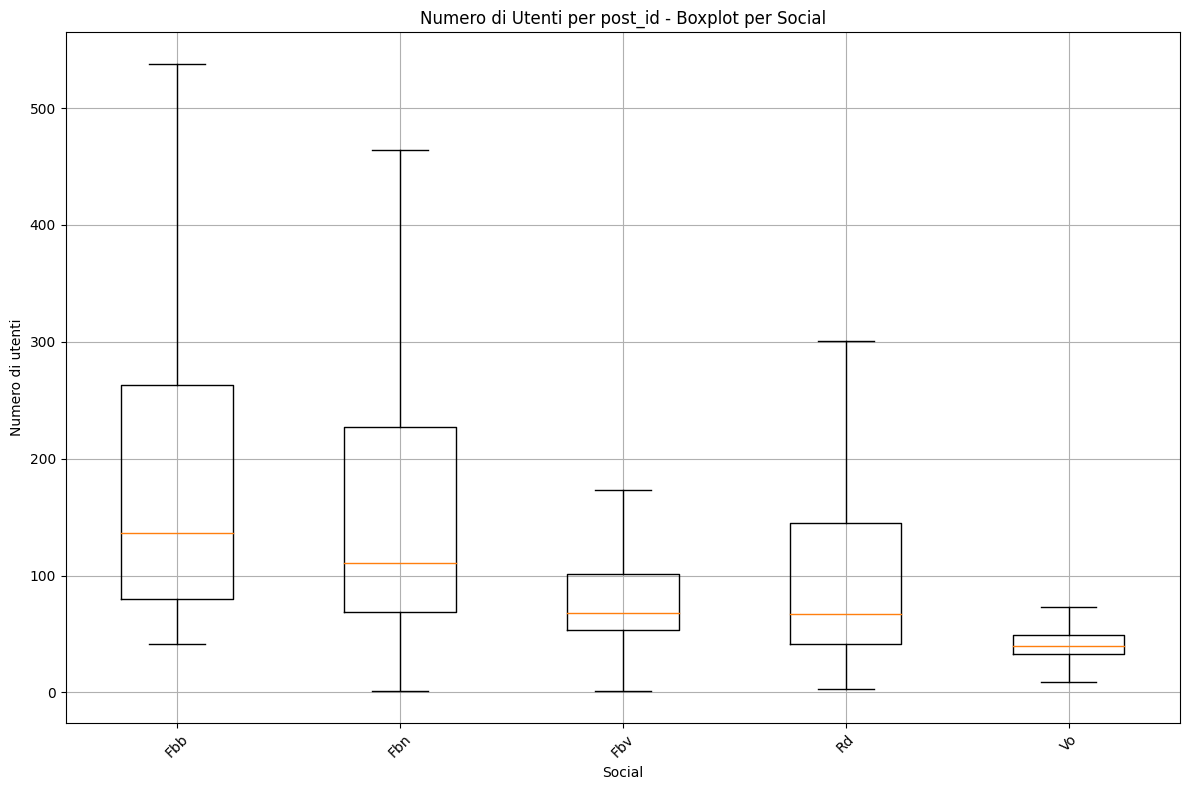

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definizione dei DataFrame per ciascun social
datasets = {
    'fbb': fbb,
    'fbn': fbn,
    'fbv': fbv,
    'vo': vo,
    'rd': rd
}

# Inizializzazione di una lista per contenere i dati aggregati per ogni social
aggregated_data = []

# Iterazione su ciascun social per aggregare il numero di utenti per post_id
for name, data in datasets.items():
    # Conta il numero di righe per ciascun post_id (assumendo che 'post_id' sia la chiave)
    post_id_counts = data.groupby('post_id')['user_id'].nunique().reset_index()
    post_id_counts.columns = ['post_id', 'num_comments']

    # Aggiungi il social come colonna
    post_id_counts['Social'] = name.capitalize()  # Aggiungi il nome del social

    # Aggiungi i dati aggregati alla lista
    aggregated_data.append(post_id_counts)

# Concatena tutti i dati aggregati in un unico DataFrame
aggregated_data = pd.concat(aggregated_data)

# Creazione del boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([group['num_comments'] for name, group in aggregated_data.groupby('Social')],
            labels=[name for name, group in aggregated_data.groupby('Social')],showfliers=False)
plt.title('Numero di Utenti per post_id - Boxplot per Social')
plt.xlabel('Social')
plt.ylabel('Numero di utenti')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostra il boxplot
plt.show()


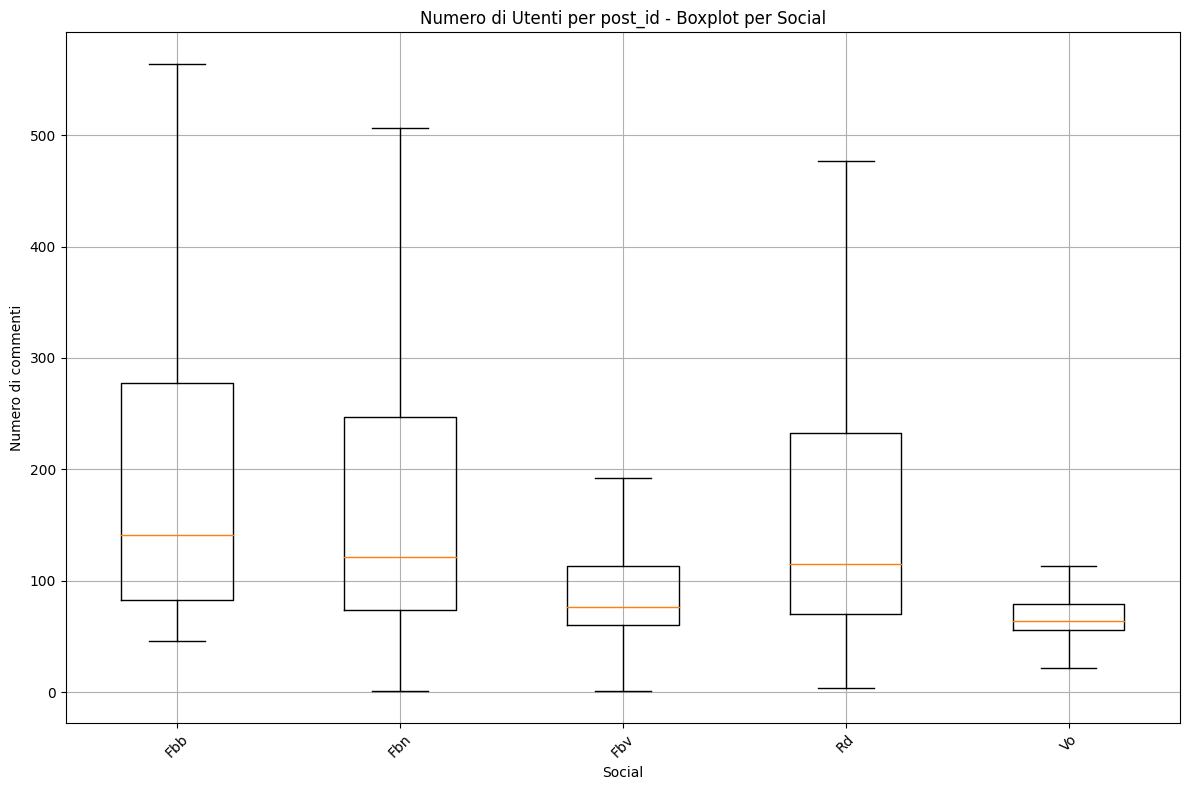

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definizione dei DataFrame per ciascun social
datasets = {
    'fbb': fbb,
    'fbn': fbn,
    'fbv': fbv,
    'vo': vo,
    'rd': rd
}

# Inizializzazione di una lista per contenere i dati aggregati per ogni social
aggregated_data = []

# Iterazione su ciascun social per aggregare il numero di utenti per post_id
for name, data in datasets.items():
    # Conta il numero di righe per ciascun post_id (assumendo che 'post_id' sia la chiave)
    post_id_counts = data['post_id'].value_counts().reset_index()
    post_id_counts.columns = ['post_id', 'num_comments']

    # Aggiungi il social come colonna
    post_id_counts['Social'] = name.capitalize()  # Aggiungi il nome del social

    # Aggiungi i dati aggregati alla lista
    aggregated_data.append(post_id_counts)

# Concatena tutti i dati aggregati in un unico DataFrame
aggregated_data = pd.concat(aggregated_data)

# Creazione del boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([group['num_comments'] for name, group in aggregated_data.groupby('Social')],
            labels=[name for name, group in aggregated_data.groupby('Social')],showfliers=False)
plt.title('Numero di Utenti per post_id - Boxplot per Social')
plt.xlabel('Social')
plt.ylabel('Numero di commenti')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostra il boxplot
plt.show()


In [ ]:

# Definizione dei DataFrame per ciascun dataset
datasets = {
    'fbb': fbb,
    'fbn': fbn,  # Assumi che fbn sia definito
    #'fbv': fbv,
    'vo': vo,
    'rd': rd
}

# Inizializzazione del DataFrame combinato
combined_data = pd.DataFrame()

# Iterazione su ciascun dataset per eseguire le operazioni richieste
for name, data in datasets.items():

    # Calcola i tempi di vita della conversazione per il dataset corrente
    fbb_p = calc_conversation_lifetime(data, percentiles)

    # Melt e aggiungi la colonna Platform per fbb_p
    fbb_melted = fbb_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
    fbb_melted['Platform'] = name.capitalize()  # Aggiungi il nome della piattaforma

    # Concatena i dati al DataFrame combinato
    combined_data = pd.concat([combined_data, fbb_melted], axis=0)

# Resetta l'indice del DataFrame combinato (opzionale)
combined_data.reset_index(drop=True, inplace=True)

# Visualizza il DataFrame combinato risultante
print("Combined data:")
print(combined_data)

Combined data:
                               post_id Percentile  Lifetime_minutes Platform
0       100959719644_10153854032719645          1          0.000089      Fbb
1       100959719644_10153863200019645          1          0.000052      Fbb
2       100959719644_10153865384964645          1          0.000097      Fbb
3       100959719644_10153868092144645          1          0.000000      Fbb
4       100959719644_10153872142709645          1          0.000000      Fbb
...                                ...        ...               ...      ...
357765                          zgjpoi         91          0.020540       Rd
357766                          zgywvw         91          0.015271       Rd
357767                          zhe54w         91          0.020955       Rd
357768                          zht491         91          0.017700       Rd
357769                          zi0360         91          0.019166       Rd

[357770 rows x 4 columns]


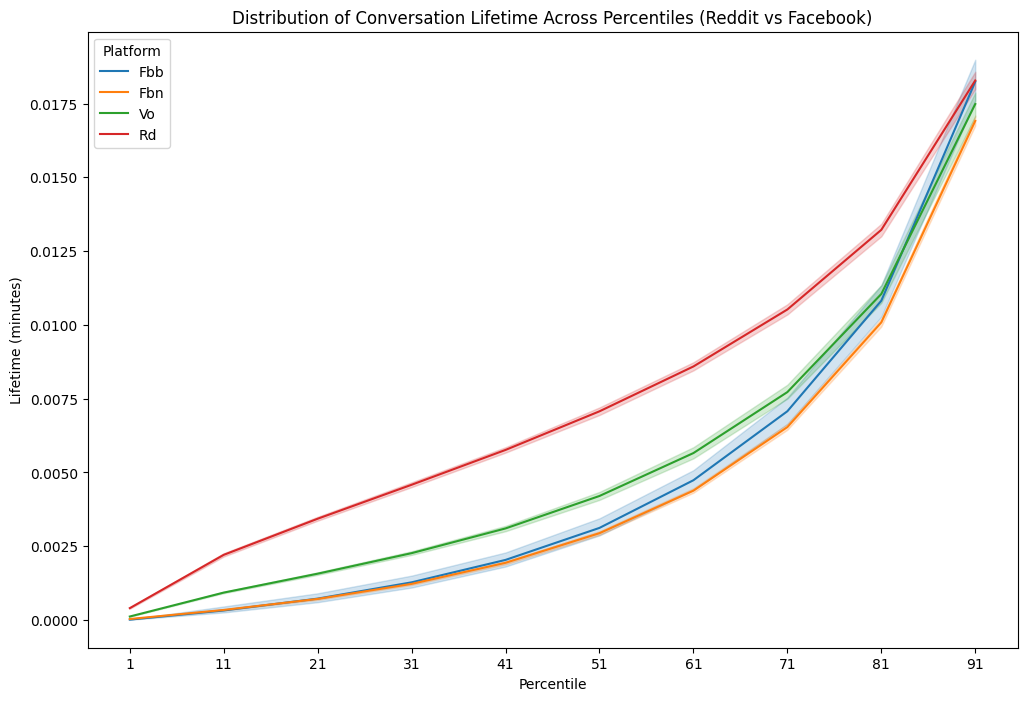

In [ ]:

df=combined_data
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
df['log_Lifetime_minutes']=df['Lifetime_minutes']
sns.lineplot(data=df, x='Percentile', y='Lifetime_minutes', hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Plot and Validation

Preparation of data

In [ ]:
observed
simulated

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Function to calculate CDF
def calculate_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# Function to calculate confidence intervals
def calculate_confidence_intervals(cdfs, confidence=0.95):
    mean_cdf = np.mean(cdfs, axis=0)
    se = stats.sem(cdfs, axis=0)
    h = se * stats.t.ppf((1 + confidence) / 2., len(cdfs) - 1)
    return mean_cdf, mean_cdf - h, mean_cdf + h

# Unique post_ids
post_ids = fbb['post_id'].unique()

# Prepare for plotting
plt.figure(figsize=(12, 8))

for post_id in tqdm(post_ids):
    thread = fbb[fbb['post_id'] == post_id]

    # Calculate CDF for each post_id
    sorted_data, cdf = calculate_cdf(thread['temporal_distance_birth_base_100h'])

    # Calculate deciles
    deciles = np.percentile(sorted_data, np.arange(0, 101, 10))

    # Calculate CDFs for deciles
    cdfs = [np.searchsorted(sorted_data, decile, side='right') / len(sorted_data) for decile in deciles]

    # Calculate mean CDF and confidence intervals
    mean_cdf, lower_ci, upper_ci = calculate_confidence_intervals(np.array([cdfs]))

    # Plot CDF
    plt.plot(deciles, mean_cdf, marker='o', linestyle='-', label=f'Post ID: {post_id}')
    plt.fill_between(deciles, lower_ci, upper_ci, alpha=0.2)

# Plot settings
plt.title('Cumulative Distribution Function with Confidence Intervals')
plt.xlabel('temporal_distance_birth_base_100h')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


The error is equal to: 0.03


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-204-9a0ffef6d68c>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Lifetime_minutes'] = np.log(df['Lifetime_minutes'])


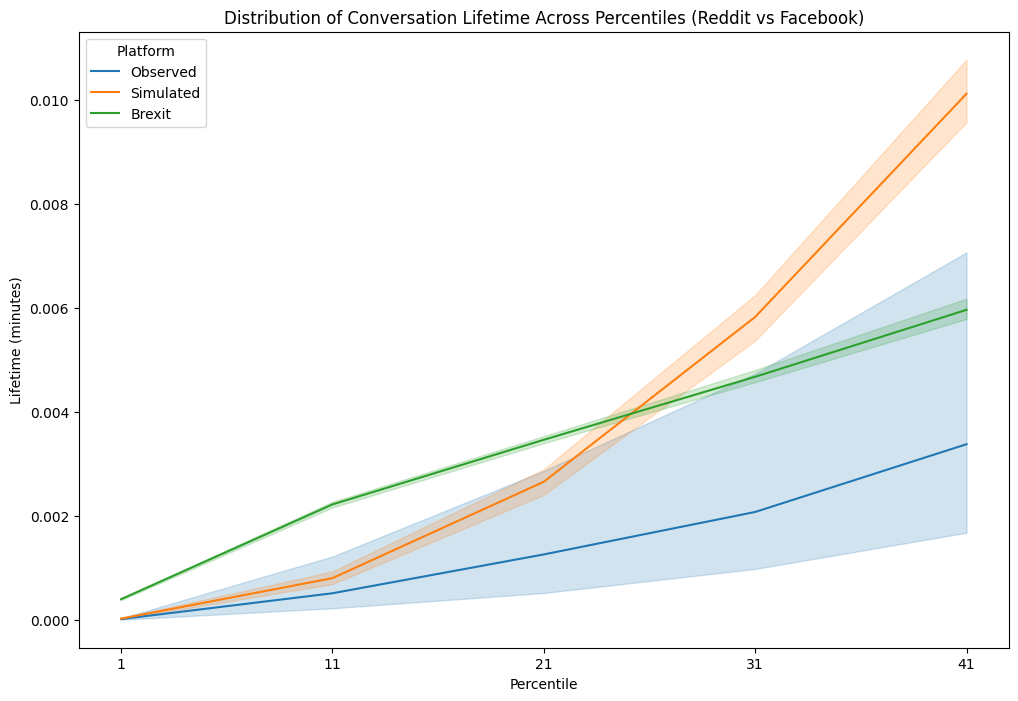

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supponiamo che le seguenti funzioni e dati siano già definiti:
# - calc_conversation_lifetime(observed, percentiles)
# - calc_conversation_lifetime(simulated, percentiles)
# - calc_conversation_lifetime(facebook_brexit, percentiles)
# - observed, simulated, facebook_brexit

# Define the percentiles
percentiles = list(range(1, 101, 10))

# Calculate conversation lifetimes for Reddit and Facebook
observed_p = calc_conversation_lifetime(observed, percentiles)
simulated_p = calc_conversation_lifetime(simulated, percentiles)
facebook_brexit_p = calc_conversation_lifetime(facebook_brexit, percentiles)

# Melt and add Platform column for observed_p
observed_melted = observed_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
observed_melted['Platform'] = 'Observed'

facebook_brexit_melted = facebook_brexit_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
facebook_brexit_melted['Platform'] = 'Brexit'

# Melt and add Platform column for simulated_p
simulated_melted = simulated_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
simulated_melted['Platform'] = 'Simulated'

# Concatenate both melted DataFrames
combined_data = pd.concat([observed_melted, simulated_melted, facebook_brexit_melted], axis=0)

# Reset index for combined_data (optional step)
combined_data.reset_index(drop=True, inplace=True)

# Filter the data if necessary
df = combined_data[combined_data['Percentile'].astype(int) < 50]
combined_data_filtered = df[df['Platform'] != 'Brexit']

# Calculate the squared difference between Simulated and Observed
combined_pivot = combined_data_filtered.pivot(index=['post_id', 'Percentile'], columns='Platform', values='Lifetime_minutes').reset_index()
combined_pivot['Lifetime_difference'] = (combined_pivot['Simulated'] - combined_pivot['Observed'])**2

error = sum(combined_pivot['Lifetime_difference'])
print('The error is equal to: ' + str(round(error, 2)))

# Plot the data
plt.figure(figsize=(12, 8))

# Adding a log transformation to Lifetime_minutes if needed
df['log_Lifetime_minutes'] = np.log(df['Lifetime_minutes'])

# Plot using seaborn with confidence intervals
sns.lineplot(data=df, x='Percentile', y='Lifetime_minutes', hue='Platform', errorbar=('ci', 99))

plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()


The error is equal to: 0.03


<ipython-input-203-6d191c79653d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Lifetime_minutes']=df['Lifetime_minutes']


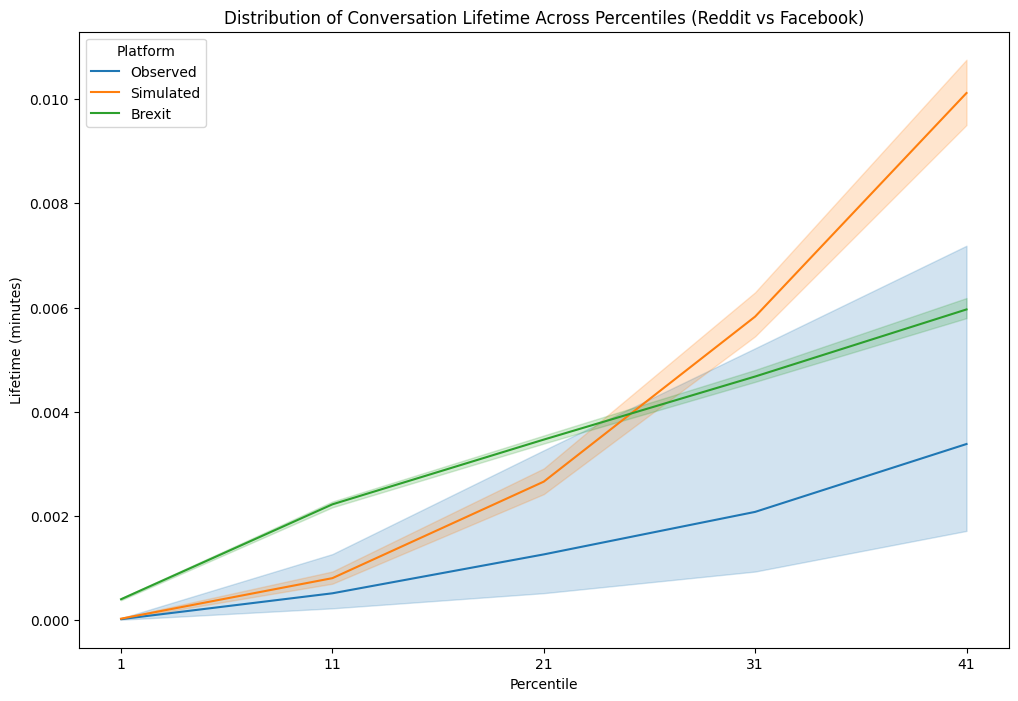

In [ ]:
# Define the percentiles
percentiles = list(range(1, 101, 10))

# Calculate conversation lifetimes for Reddit and Facebook
observed_p = calc_conversation_lifetime(observed, percentiles)
simulated_p = calc_conversation_lifetime(simulated, percentiles)
facebook_brexit_p = calc_conversation_lifetime(facebook_brexit, percentiles)


# Melt and add Platform column for observed_p
observed_melted = observed_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
observed_melted['Platform'] = 'Observed'

facebook_brexit_melted = facebook_brexit_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
facebook_brexit_melted['Platform'] = 'Brexit'

# Melt and add Platform column for simulated_p
simulated_melted = simulated_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
simulated_melted['Platform'] = 'Simulated'

# Concatenate both melted DataFrames
combined_data = pd.concat([observed_melted, simulated_melted,facebook_brexit_melted], axis=0)

# Reset index for combined_data (optional step)
combined_data.reset_index(drop=True, inplace=True)


###
df=combined_data[combined_data['Percentile'].astype(int)<50]
combined_data_filtered=df[df['Platform']!='Brexit']
combined_pivot = combined_data_filtered.pivot(index=['post_id', 'Percentile'], columns='Platform', values='Lifetime_minutes').reset_index()
combined_pivot['Lifetime_difference'] = (combined_pivot['Simulated'] - combined_pivot['Observed'])**2

error=(sum(combined_pivot['Lifetime_difference']))
print('The error is equal to: '+ str(round(error,2)))

###
df=combined_data[combined_data['Percentile'].astype(int)<50]
plt.figure(figsize=(12, 8))
df['log_Lifetime_minutes']=df['Lifetime_minutes']
sns.lineplot(data=df, x='Percentile', y='Lifetime_minutes', hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Grid search

In [ ]:
def simulate_and_calculate_error(a, b, alpha, lambda_, mu, sd, k):
    data = []
    sample_post_ids = pd.Series(social['post_id'].unique()).sample(n=500).tolist()
    for th in (sample_post_ids):
        thread = social[social['post_id'] == th]
        number_of_users = thread['user_id'].nunique()
        T0s = simulate_inital_comment(a, b, size=number_of_users)

        for user in range(number_of_users):
            T0 = T0s[user]
            N = int(simulate_number_of_comments(alpha, lambda_) + 1)
            timing = [0] * N
            for i in range(N):
                if i == 0:
                    timing[i] = T0
                elif i == N - 1:
                    timing[i] = abd(np.random.normal(mu, sd) / mu**2)
                else:
                    timing[i] = abs(np.random.normal(mu * k, sd) / mu**2)

            timing = np.cumsum(timing)
            timing = [x for x in timing if x <= 1]

            for t in timing:
                data.append({'user_id': f'User_{user}', 'post_id': th, 'temporal_distance_birth_base_100h': t})

    simulated = pd.DataFrame(data)
    observed = social[social['post_id'].isin(simulated.post_id.unique())][['user_id', 'post_id', 'temporal_distance_birth_base_100h']]

    # Calculate conversation lifetimes for each percentile
    def calc_conversation_lifetime(df, percentiles):
        results = {}
        grouped = df.groupby('post_id')['temporal_distance_birth_base_100h']

        for perc in percentiles:
            quantiles = grouped.quantile(perc / 100).reset_index()
            quantiles.columns = ['post_id', f'conversation_lifetime_{perc}perc_minutes']
            results[f'{perc}'] = quantiles.set_index('post_id')[f'conversation_lifetime_{perc}perc_minutes']
        result_df = pd.concat(results.values(), axis=1, keys=results.keys(), join='outer')

        return result_df

    # Define percentiles
    percentiles = list(range(1, 101, 10))

    # Calculate conversation lifetimes for observed and simulated data
    observed_p = calc_conversation_lifetime(observed, percentiles)
    simulated_p = calc_conversation_lifetime(simulated, percentiles)

    # Melt and add Platform column for observed_p
    observed_melted = observed_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
    observed_melted['Platform'] = 'Observed'

    # Melt and add Platform column for simulated_p
    simulated_melted = simulated_p.reset_index().melt(id_vars='post_id', var_name='Percentile', value_name='Lifetime_minutes')
    simulated_melted['Platform'] = 'Simulated'

    # Concatenate both melted DataFrames
    combined_data = pd.concat([observed_melted, simulated_melted], axis=0)

    # Pivot to have Observed and Simulated as columns
    combined_pivot = combined_data.pivot(index=['post_id', 'Percentile'], columns='Platform', values='Lifetime_minutes').reset_index()

    # Calculate the difference between Simulated and Observed lifetimes
    combined_pivot['Lifetime_difference'] = (combined_pivot['Simulated'] - combined_pivot['Observed']) ** 2

    # Calculate total error
    total_error = sum(combined_pivot['Lifetime_difference'].dropna())

    return total_error

Platform,post_id,Percentile,Observed,Simulated,Lifetime_difference
0,0,1,0.000000,0.000621,3.853637e-07
1,0,11,0.000000,0.000621,3.853637e-07
2,0,21,0.000000,0.000621,3.853637e-07
3,0,31,0.000000,0.000621,3.853637e-07
4,0,41,0.000000,0.000621,3.853637e-07
...,...,...,...,...,...
52995,3581167,51,0.002036,0.000007,4.115726e-06
52996,3581167,61,0.002396,0.000370,4.105709e-06
52997,3581167,71,0.002700,0.000753,3.789535e-06
52998,3581167,81,0.003016,0.002154,7.437263e-07


In [ ]:
import pandas as pd
from tqdm import tqdm
from itertools import product

social=vo

# Define the parameter grid
param_grid = {
    'a': [0.01,0.02,0.1,0.5],
    'b': [ 12,15,25,27,29,31,33,35],
    'alpha': [0.5,0.7,0.8, 0.95],
    'lambda_': [ 2, 3],
    'mu': [150],
    'sd': [ 20],
    'k': [1]
}

# Initialize variables to track best parameters and error
best_params = None
min_error = float('inf')
results = []

# Iterate over all combinations of parameters
for params in tqdm(list(product(*param_grid.values()))):
    current_params = {param_name: param_value for param_name, param_value in zip(param_grid.keys(), params)}
    current_error = simulate_and_calculate_error(**current_params)

    # Store the results in a list of dictionaries
    results.append({
        **current_params,
        'error': current_error
    })

    # Check if current parameters give a lower error than previously found
    if current_error < min_error:
        min_error = current_error
        best_params = current_params

print("Grid search complete.")
print("Best parameters found:")
print(best_params)
print("Minimum error found:", min_error)

# Convert results into a pandas DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('grid_search_results.csv', index=False)

# Display the DataFrame (optional)
print("\nGrid search results:")
print(results_df)


3.7943226354232715

In [ ]:
import pandas as pd
from tqdm import tqdm
from itertools import product


social=rd
# Define the parameter grid
param_grid = {
    'a': [0.2, 0.35, 0.5,1,1.5,3],
    'b': [3, 8, 10,12],
    'alpha': [0.5,0.8, 0.95],
    'lambda_': [1,  3],
    'mu': [150],
    'sd': [ 20],
    'k': [1]
}

# Initialize variables to track best parameters and error
best_params = None
min_error = float('inf')
results = []

# Iterate over all combinations of parameters
for params in tqdm(list(product(*param_grid.values()))):
    current_params = {param_name: param_value for param_name, param_value in zip(param_grid.keys(), params)}
    current_error = simulate_and_calculate_error(**current_params)

    # Store the results in a list of dictionaries
    results.append({
        **current_params,
        'error': current_error
    })

    # Check if current parameters give a lower error than previously found
    if current_error < min_error:
        min_error = current_error
        best_params = current_params

print("Grid search complete.")
print("Best parameters found:")
print(best_params)
print("Minimum error found:", min_error)

# Convert results into a pandas DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('grid_search_results.csv', index=False)

# Display the DataFrame (optional)
print("\nGrid search results:")
print(results_df)


,a,b,alpha,lambda_,mu,sd,k,error
0,0.01,12,0.50,2,150,20,1,0.821792
1,0.01,12,0.50,3,150,20,1,3.374400
2,0.01,12,0.70,2,150,20,1,3.703699
3,0.01,12,0.70,3,150,20,1,2.455319
4,0.01,12,0.80,2,150,20,1,4.208984
...,...,...,...,...,...,...,...,...
251,0.50,35,0.70,3,150,20,1,2.198059
252,0.50,35,0.80,2,150,20,1,2.951722
253,0.50,35,0.80,3,150,20,1,1.974196
254,0.50,35,0.95,2,150,20,1,5.302671
